In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch
import scipy.signal as sg
from scipy.integrate import cumtrapz
from numpy import where

# Sampling frequency
fs = 1500  # Hz
nyq = 0.5 * fs

def rectify(data):
    rec = abs(data)
    return rec

def lowpass_filter(data, cutoff_l, fs, order):
    lp_cutoff = cutoff_l/nyq
    n, d = butter(order, lp_cutoff, btype='low', analog=False)
    filtered = filtfilt(n, d, data)
    return filtered

def rms_sliding(a, window_size):
    a2 = np.power(a,2)
    window = np.ones(window_size)/float(window_size)
    rms_value = np.sqrt(np.convolve(a2, window, 'same'))
    return rms_array

def rms(a):
    a2 = np.power(a, 2)
    mean_squared = np.mean(a2)  # Calculate the mean of squared values
    rms_value = np.sqrt(mean_squared)  # Take the square root to get RMS value
    return rms_value

def mdf(data, fs):
    f, P = welch(data, fs=fs)
    # Total Power and Median Frequency (Frequency that divides the spectrum into two regions with equal power)
    area_freq = cumtrapz(P, f, initial=0)
    total_power = area_freq[-1]
    median_freq = f[where(area_freq >= total_power / 2)[0][0]]
    return mdf

# anterior deltoid

In [21]:
AD = pd.read_csv(r"data\AD.csv")
AD = AD.values[:, 0]

curl_AD = pd.read_excel(r"AD_onset.xlsx")

start = curl_AD.iloc[3:12, 0]    
stop = curl_AD.iloc[4:13, 0]
start = start.tolist()
stop = stop.tolist()

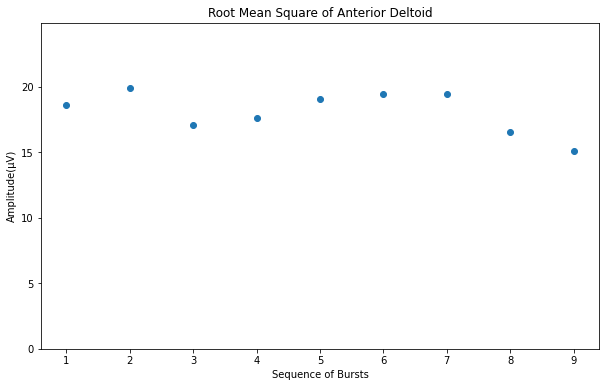

In [22]:
AD_RMS = []
for i in range(9): 
    single_curl = AD[start[i]: stop[i]]
    rms_curl = rms(single_curl)
    AD_RMS.append(rms_curl)

# Plot AD_RMS  root mean suqare
plt.figure(figsize=(10, 6))
plt.scatter(range(1, 10), AD_RMS, marker='o')  # Assuming 9 segments
plt.xlabel('Sequence of Bursts')
plt.ylabel('Amplitude(μV)')
plt.title('Root Mean Square of Anterior Deltoid')
plt.ylim(0,max(AD_RMS)+5)
#plt.grid(True)
plt.show()

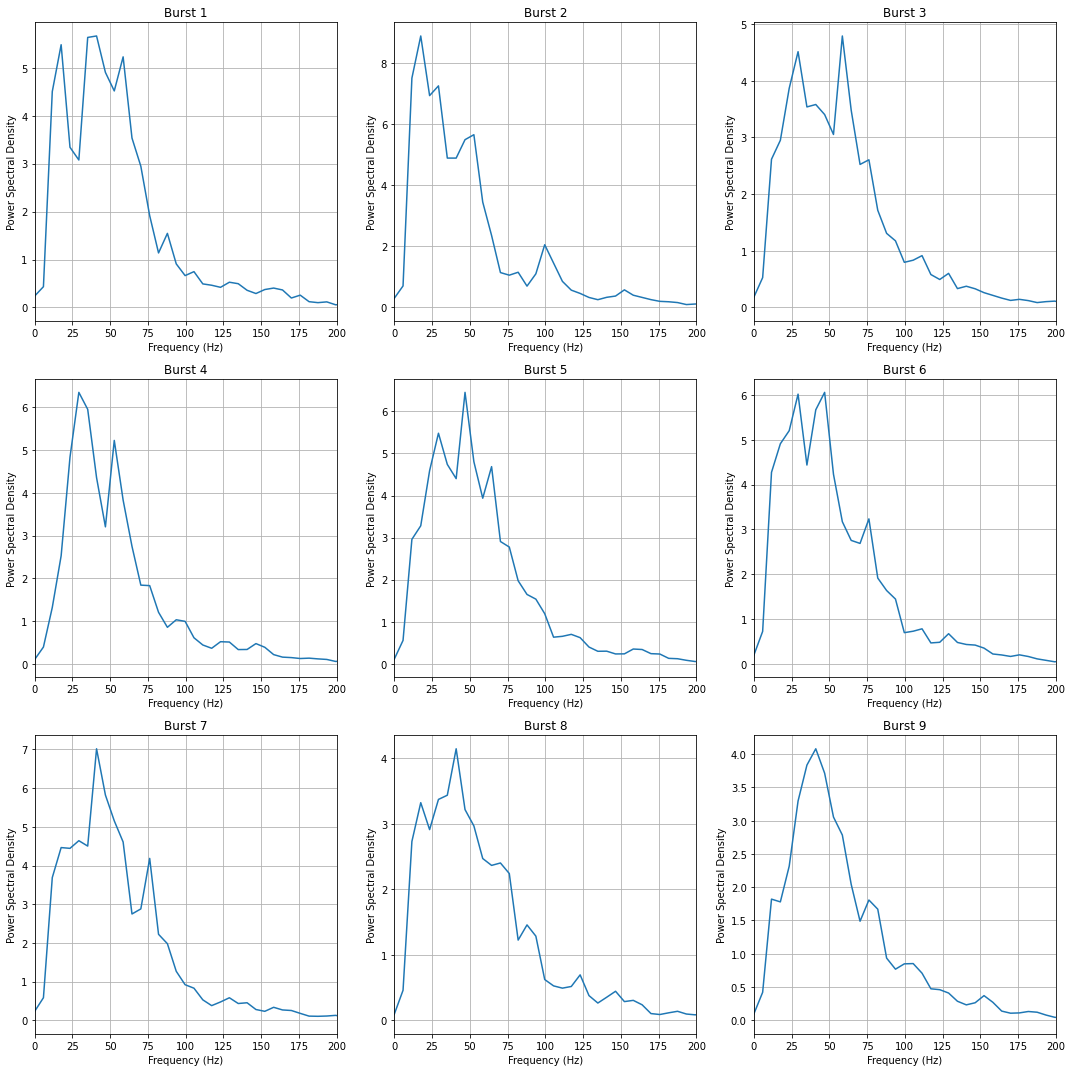

In [23]:
AD_MDF = []
# Create subplots
num_rows = 3
num_cols = 3
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i in range(9): 
    single_curl = AD[start[i]: stop[i]]
    
    f, P = welch(single_curl, fs=fs)
    # Total Power and Median Frequency (Frequency that divides the spectrum into two regions with equal power)
    area_freq = cumtrapz(P, f, initial=0)
    total_power = area_freq[-1]
    mdf_curl = f[where(area_freq >= total_power / 2)[0][0]]
        
    # Plot the frequency spectrum in subplots
    row = i // num_cols
    col = i % num_cols
    axs[row, col].plot(f, P)
    axs[row, col].set_xlabel('Frequency (Hz)')
    axs[row, col].set_xlim(0, 200)
    axs[row, col].set_ylabel('Power Spectral Density')
    axs[row, col].set_title(f'Burst {i+1}')
    axs[row, col].grid(True)
    
    AD_MDF.append(mdf_curl)

plt.tight_layout()
plt.show()

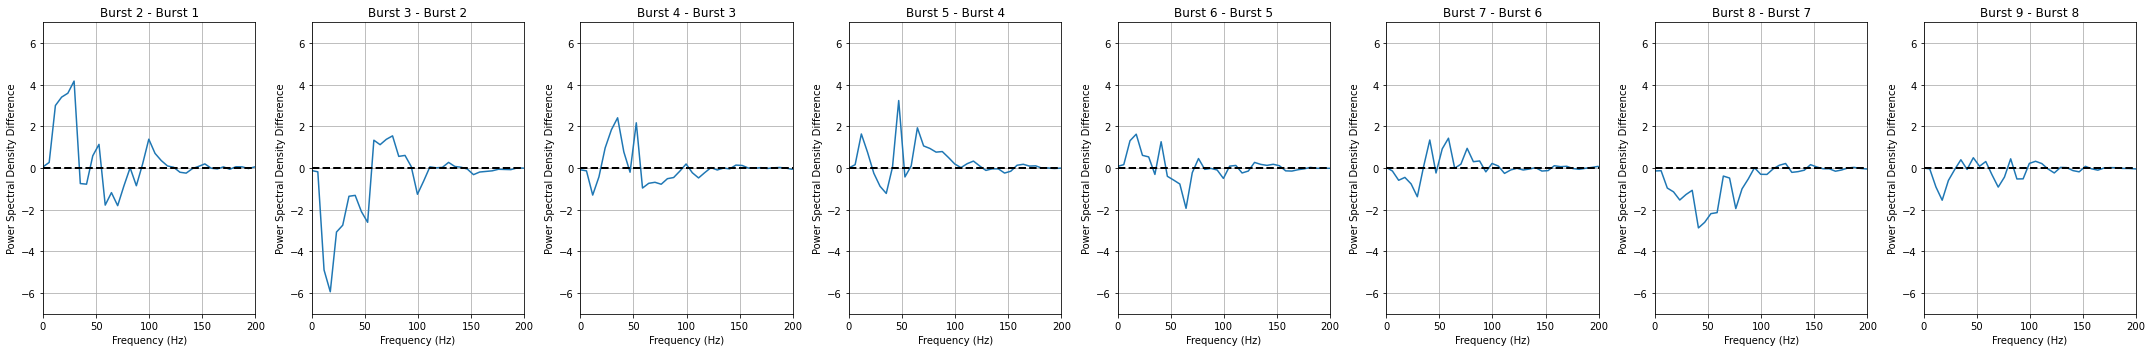

In [36]:
# Create subplots
num_rows = 1
num_cols = 8
fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 5))

# Iterate over bursts
for i in range(1, 9):  # Start from 1 to calculate differences
    # Extract data for the current burst and previous burst
    single_curl_cur = AD[start[i]: stop[i]]
    single_curl_prev = AD[start[i-1]: stop[i-1]]
    
    # Compute the PSD for the current burst
    f_cur, P_cur = welch(single_curl_cur, fs=fs)
    
    # Compute the PSD for the previous burst
    f_prev, P_prev = welch(single_curl_prev, fs=fs)
    
    # Calculate the difference in PSD between consecutive bursts
    diff_P = P_cur - P_prev
    
    # Plot the difference in frequency spectrum in subplots
    col = i - 1  # Use i - 1 to correctly index axs
    axs[col].plot(f_cur, diff_P)
    axs[col].set_xlabel('Frequency (Hz)')
    axs[col].set_xlim(0, 200)
    axs[col].set_ylim(-7, 7)
    axs[col].set_ylabel('Power Spectral Density Difference')
    axs[col].set_title(f'Burst {i+1} - Burst {i}')
    axs[col].grid(True)
    
    axs[col].axhline(y=0, color='k', linewidth=2.0, linestyle='--')
    
    # Store the median frequency of the current burst
    AD_MDF.append(mdf_curl)

plt.tight_layout()
plt.show()


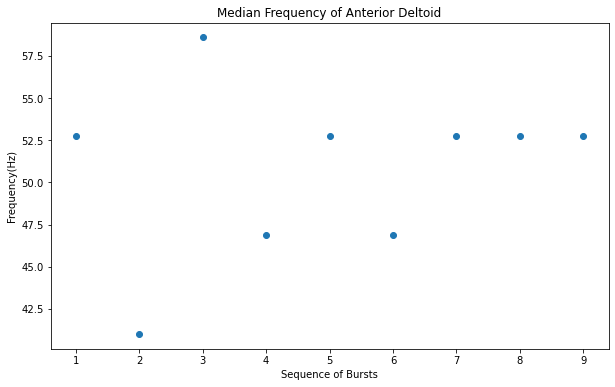

In [24]:
# Plot AD_MDF  median frequency
plt.figure(figsize=(10, 6))
plt.scatter(range(1, 10), AD_MDF, marker='o')  # Assuming 9 segments
plt.xlabel('Sequence of Bursts')
plt.ylabel('Frequency(Hz)')
plt.title('Median Frequency of Anterior Deltoid')
plt.show()